## Import libraries

In [10]:
import glob
from tqdm import tqdm
import datetime
import re
import pandas as pd
import seaborn as sns
import warnings
import os
import pickle
import numpy as np
import utils as ut
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.patches as mpatches
import matplotlib
from scipy import stats
import matplotlib.colors as mcolors

## Fetch data

In [127]:
Animal_List = [
            #    'QP032', 'QP033', 'QP034',
               'QP049',
            #    'QP050', 'QP051', 'QP062', 'QP063', 'QP070', 'QP071', 'QP079', 'QP080',
               'QP081', 'QP082',
               ]

# Define the path to the cache file
cache_path = '/Users/quentin/Desktop/HeadFixedBehavior/Data/'
cache_file = os.path.join(cache_path, "opto_data.pkl")

# Check if the cache file exists
if os.path.exists(cache_file):
    # If the cache file exists, load the data from the cache
    with open(cache_file, "rb") as f:       
        opto_data = pickle.load(f)
else:
    # If the cache file does not exist, load the data from the remote server
    opto_data = pd.DataFrame()
    for animal in Animal_List:
        try:
            # Load the data for the current animal and add it to the dictionary
            animal_data = ut.get_animal_data('/Volumes/akrami/Quentin/Head_Fixed_Behavior/Data/',
                                             animal, 
                                             'SOUND_CAT_CONT',
                                             'Trial_Summary')
            opto_data = pd.concat([opto_data, animal_data])
        except:
            # If there is an error loading the data, skip the current animal
            pass

    # Save the data to the cache file
    with open(cache_file, "wb") as f:
        pickle.dump(opto_data, f)

## Filter data

In [128]:
data_df = ut.relabel_ELV(opto_data) # Re-label appropriately
# TODO: change block removal with date removal
# find where antibias is nan in data_df and set it to False
data_df.loc[data_df.Anti_Bias.isna(), 'Anti_Bias'] = False
# only keep data where antibias is False or np.nan
data_df = data_df[(data_df.Anti_Bias == False) | (pd.isna(data_df.Anti_Bias))].reset_index(drop=True)
# data_df = ut.filter_min_trials(data_df, 100) # Keep at least 100 valid trials per sessions
# data_df = ut.threshold_cutoff(data_df, threshold = 0.7) # Only keep sessions where %correct is > threshold

# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     data_df = ut.filter_lapses(data_df, threshold = 0.75) # Remove sessions with lapse rates > 20%
    
data_df = ut.add_dist_block(data_df) # Track distribution and mouse specific block_nbs
data_df = ut.check_distributions(data_df, n = 1) # Check thal all subjects have been exposed to n distributions
# data_df = make_blocks_equal(data_df) # Check that all subjects have same number of blocks on each distribution (optional) 
data_df = data_df[data_df['Distribution'].notna()].reset_index(drop=True) # Check distributions are valid
# Ensure thal all blocks follow the desired order (e.g.   ['Uniform', 'Asym_right', 'Asym_left']) (optional)
# data_df = sort_consec_dist(data_df, ['Uniform', 'Asym_right', 'Asym_left']) 

In [129]:
# everywhere where Opto_ON is nan with Opto_ON = False
data_df.loc[data_df.Opto_ON.isna(), 'Opto_ON'] = False
# everywhere where LED_ON is nan with LED_ON = False
data_df.loc[data_df.LED_ON.isna(), 'LED_ON'] = False

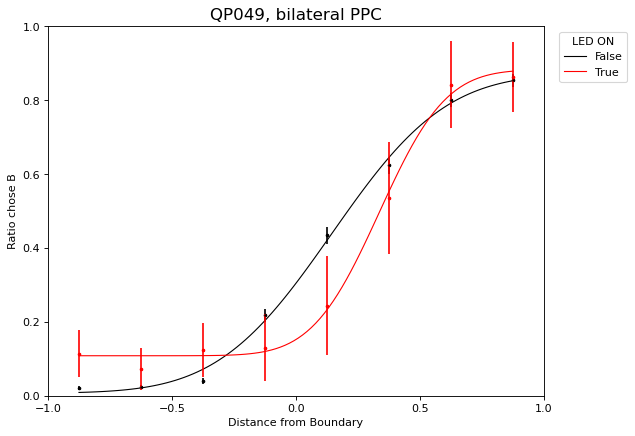

In [130]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# isolate data for QP049

subject_df = data_df[data_df.Participant_ID == 'QP049']
color_dict={True: 'r', False: 'k'}
for led_state in subject_df.LED_ON.unique():
    state_df = subject_df[subject_df.LED_ON == led_state]
    ut.psycho_plot(state_df, ut.psycho_fit(state_df)[0],
                     label= led_state,
                        color= color_dict[led_state],
                        ax=ax)

plt.title(subject_df.Participant_ID.unique()[0] + ', bilateral PPC', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='LED ON')
plt.show()

False
True


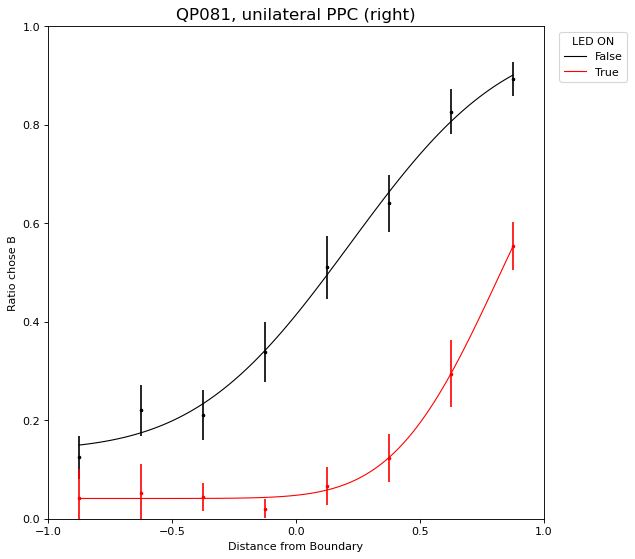

In [137]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

subject_df = data_df[data_df.Participant_ID == 'QP081']
for led_state in subject_df.LED_ON.unique():
    print(led_state)
    state_df = subject_df[subject_df.LED_ON == led_state]
    ut.psycho_plot(state_df, ut.psycho_fit(state_df)[0],
                     label= led_state,
                        color= color_dict[led_state],
                        ax=ax)
    
plt.title(subject_df.Participant_ID.unique()[0] + ', unilateral PPC (right)', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='LED ON')
# save ad PDF with dpi = 300, and bbox_inches = 'tight'
save_path = '/Users/quentin/Desktop/HeadFixedBehavior/Analysis/Figures/'
plt.savefig(save_path + 'QP081_unilateral_PPC_right.pdf', dpi=300, bbox_inches='tight')
plt.show()


True
False


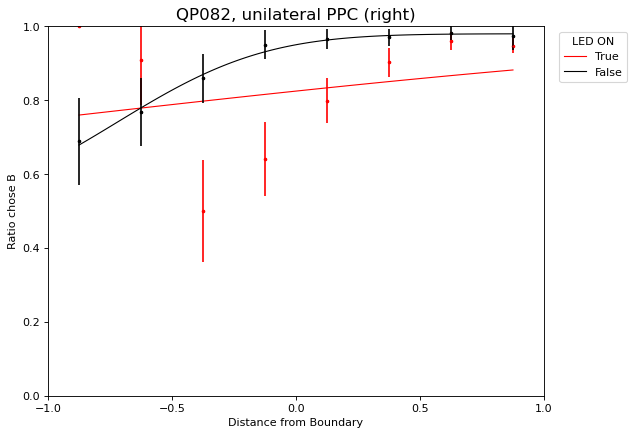

In [134]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

subject_df = data_df[data_df.Participant_ID == 'QP082']
for led_state in subject_df.LED_ON.unique():
    print(led_state)
    state_df = subject_df[subject_df.LED_ON == led_state]
    ut.psycho_plot(state_df, ut.psycho_fit(state_df)[0],
                     label= led_state,
                        color= color_dict[led_state],
                        ax=ax)
    
plt.title(subject_df.Participant_ID.unique()[0] + ', unilateral PPC (right)', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='LED ON')
plt.show()
